# BibRec: Training Random Forest Model

### Train Random Forest Model on top-rated books
RF Features: Country, State, Age, Year-of-Publication, Publisher

In [33]:
# Specify where to save the model
model_file = "rf5-ex2.pkl"

In [34]:
from bibrec.server.Utils import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

books, users, ratings = get_normalized_data(books_path='data/BX-Books.csv',
                                            users_path='data/BX-Users.csv',
                                            ratings_path='data/BX-Book-Ratings.csv')

/run/media/fab/Dev/repos/FH-SBG/MMT1/RES/recommender-systems/bibrec/server/Utils.py:12: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep=";", encoding="latin-1")
/run/media/fab/Dev/repos/FH-SBG/MMT1/RES/recommender-systems/bibrec/server/Utils.py:94: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  location_seperated = users.location.str.split(',', 2, expand=True)


In [35]:
users

,user_id,age,city,state,country,user_mean,user_count
0,1,21.574113,nyc,new_york,usa,0.0,0.0
1,2,18.000000,stockton,california,usa,0.0,0.0
2,3,27.721639,moscow,other,other,0.0,0.0
3,4,17.000000,porto,other,portugal,0.0,0.0
4,5,29.836021,farnborough,other,united_kingdom,0.0,0.0
...,...,...,...,...,...,...,...
278853,278854,19.194392,portland,oregon,usa,7.0,6.0
278854,278855,50.000000,tacoma,washington,united_kingdom,0.0,0.0
278855,278856,40.248401,brampton,ontario,canada,0.0,0.0
278856,278857,20.185421,knoxville,other,usa,0.0,0.0


In [36]:
books = books.drop(["isbn"], axis=1)
books

,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,isbn13,rating_mean,rating_count,normalized_year_of_publication
0,Classical Mythology,Mark P. O. Morford,2002,other,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,9780195153446,0.000000,0.0,3
1,Clara Callan,Richard Bruce Wright,2001,other,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,9780002005012,7.666667,9.0,4
2,Decision in Normandy,Carlo D'Este,1991,other,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,9780060973124,7.500000,2.0,14
3,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,other,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,9780374157067,7.833333,6.0,6
4,The Mummies of Urumchi,E. J. W. Barber,1999,other,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,9780393045215,0.000000,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...
270939,There's a Bat in Bunk Five,Paula Danziger,1988,other,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,978044040095,7.000000,1.0,17
270940,From One to One Hundred,Teri Sloat,1991,other,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,978052544763,4.000000,1.0,14
270941,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,other,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,9780060086671,0.000000,0.0,1
270942,Republic (World's Classics),Plato,1996,other,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,9780192126047,0.000000,0.0,9


In [37]:
ratings = ratings.drop(["isbn"], axis=1)
ratings

,isbn13,normalized_rating,user_id,book_rating
0,9780155061224,0.0,276726,5
1,9780521656153,-1.5,276729,3
2,9780521795029,1.5,276729,6
3,9780385501200,0.0,276744,7
4,9780385501200,0.0,11676,10
...,...,...,...,...
9444717,9780515107661,0.0,242006,10
9444718,9780515107661,0.0,249628,10
9444719,9780515107661,0.0,276709,10
9444720,9780590442442,0.0,197659,8


In [38]:
# TODO: Experiment 2
top_ratings = ratings[:10_000]

In [39]:
encoded_books = hot_encode_books(books)
encoded_books

,book_title,book_author,year_of_publication,image_url_s,image_url_m,image_url_l,isbn13,rating_mean,rating_count,normalized_year_of_publication,...,publisher_harpercollins,publisher_fawcett_books,publisher_signet_book,publisher_random_house_inc,publisher_st_martins_pr,publisher_st._martin's_press,publisher_tor_books,publisher_harpercollins_publishers,publisher_zebra_books,publisher_other
0,Classical Mythology,Mark P. O. Morford,2002,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,9780195153446,0.000000,0.0,3,...,0,0,0,0,0,0,0,0,0,1
1,Clara Callan,Richard Bruce Wright,2001,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,9780002005012,7.666667,9.0,4,...,0,0,0,0,0,0,0,0,0,1
2,Decision in Normandy,Carlo D'Este,1991,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,9780060973124,7.500000,2.0,14,...,0,0,0,0,0,0,0,0,0,1
3,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,9780374157067,7.833333,6.0,6,...,0,0,0,0,0,0,0,0,0,1
4,The Mummies of Urumchi,E. J. W. Barber,1999,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,9780393045215,0.000000,0.0,6,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270939,There's a Bat in Bunk Five,Paula Danziger,1988,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,978044040095,7.000000,1.0,17,...,0,0,0,0,0,0,0,0,0,1
270940,From One to One Hundred,Teri Sloat,1991,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,978052544763,4.000000,1.0,14,...,0,0,0,0,0,0,0,0,0,1
270941,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,9780060086671,0.000000,0.0,1,...,0,0,0,0,0,0,0,0,0,1
270942,Republic (World's Classics),Plato,1996,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,9780192126047,0.000000,0.0,9,...,0,0,0,0,0,0,0,0,0,1


In [40]:
encoded_users = hot_encode_users(users)
encoded_users

,user_id,age,city,user_mean,user_count,country_usa,country_canada,country_united_kingdom,country_germany,country_spain,...,state_ohio,state_michigan,state_oregon,state_virginia,state_massachusetts,state_missouri,state_nordrhein-westfalen,state_north_carolina,state_,state_other
0,1,21.574113,nyc,0.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,18.000000,stockton,0.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,27.721639,moscow,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,17.000000,porto,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,29.836021,farnborough,0.0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278853,278854,19.194392,portland,7.0,6.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
278854,278855,50.000000,tacoma,0.0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
278855,278856,40.248401,brampton,0.0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278856,278857,20.185421,knoxville,0.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [41]:
# RF Features: Country, State, Age, Year-of-Publication, Publisher
df_books = encoded_books.filter(regex="isbn13|normalized_year_of_publication|publisher_", axis=1)
df_books

,isbn13,normalized_year_of_publication,publisher_harlequin,publisher_silhouette,publisher_pocket,publisher_ballantine_books,publisher_bantam_books,publisher_scholastic,publisher_simon_&amp;_schuster,publisher_penguin_books,...,publisher_harpercollins,publisher_fawcett_books,publisher_signet_book,publisher_random_house_inc,publisher_st_martins_pr,publisher_st._martin's_press,publisher_tor_books,publisher_harpercollins_publishers,publisher_zebra_books,publisher_other
0,9780195153446,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,9780002005012,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,9780060973124,14,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,9780374157067,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,9780393045215,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270939,978044040095,17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
270940,978052544763,14,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
270941,9780060086671,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
270942,9780192126047,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [42]:
df_users = encoded_users.filter(regex="user_id|age|country_|state_", axis=1)
df_users

,user_id,age,country_usa,country_canada,country_united_kingdom,country_germany,country_spain,country_australia,country_italy,country_france,...,state_ohio,state_michigan,state_oregon,state_virginia,state_massachusetts,state_missouri,state_nordrhein-westfalen,state_north_carolina,state_,state_other
0,1,21.574113,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,18.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,27.721639,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,17.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,29.836021,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278853,278854,19.194392,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
278854,278855,50.000000,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278855,278856,40.248401,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278856,278857,20.185421,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [43]:
# TODO: normalized_rating doesn't make sense yet
# df = df_ratings.filter(regex="isbn13|user_id|normalized_rating", axis=1)
df_ratings = top_ratings.filter(regex="isbn13|user_id|book_rating", axis=1)
df_ratings

,isbn13,user_id,book_rating
0,9780155061224,276726,5
1,9780521656153,276729,3
2,9780521795029,276729,6
3,9780385501200,276744,7
4,9780385501200,11676,10
...,...,...,...
9995,9780025427303,173291,7
9996,9780025427303,174216,5
9997,9780025427303,174615,7
9998,9780025427303,175117,6


In [44]:
df = df_ratings
df = df.merge(df_books, on="isbn13", how="left")
df = df.merge(df_users, on="user_id", how="left")
# df = df.merge(df_books, on="isbn13")
# df = df.merge(df_users, on="user_id")
df

,isbn13,user_id,book_rating,normalized_year_of_publication,publisher_harlequin,publisher_silhouette,publisher_pocket,publisher_ballantine_books,publisher_bantam_books,publisher_scholastic,...,state_ohio,state_michigan,state_oregon,state_virginia,state_massachusetts,state_missouri,state_nordrhein-westfalen,state_north_carolina,state_,state_other
0,9780155061224,276726,5,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9780521656153,276729,3,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9780521795029,276729,6,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9780385501200,276744,7,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9780385501200,11676,10,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9780025427303,173291,7,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9996,9780025427303,174216,5,11,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9997,9780025427303,174615,7,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,9780025427303,175117,6,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# Features
# X = df.drop(['user_id', 'isbn13', 'book_rating'], axis=1)
X = df.drop(['user_id', 'book_rating'], axis=1)
# Prediction
Y = df['book_rating']

In [46]:
X

,isbn13,normalized_year_of_publication,publisher_harlequin,publisher_silhouette,publisher_pocket,publisher_ballantine_books,publisher_bantam_books,publisher_scholastic,publisher_simon_&amp;_schuster,publisher_penguin_books,...,state_ohio,state_michigan,state_oregon,state_virginia,state_massachusetts,state_missouri,state_nordrhein-westfalen,state_north_carolina,state_,state_other
0,9780155061224,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9780521656153,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9780521795029,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9780385501200,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9780385501200,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9780025427303,11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9996,9780025427303,11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9997,9780025427303,11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,9780025427303,11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
Y

0        5
1        3
2        6
3        7
4       10
        ..
9995     7
9996     5
9997     7
9998     6
9999    10
Name: book_rating, Length: 10000, dtype: int64

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=7)

In [49]:
from os.path import exists
import pickle

if exists(model_file):
    print("Loading file:", model_file)
    with open(model_file, "rb") as file:
        rfc = pickle.load(file)
else:
    print("Creating new model:", model_file)
    rfc = RandomForestClassifier(n_estimators=100, min_weight_fraction_leaf=0, n_jobs=3, random_state=1, verbose=10)

Creating new model: rf5-ex2.pkl


In [50]:
rfc.fit(X_train, y_train)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    0.2s


building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100building tree 37 of 100

building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62

[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    0.4s


building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:    0.5s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:    0.6s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.6s finished


RandomForestClassifier(min_weight_fraction_leaf=0, n_jobs=3, random_state=1,
                       verbose=10)

In [51]:
import pickle

# Save the model to a file
with open(model_file, "wb") as file:
    pickle.dump(rfc, file)

In [52]:
rfc_pred = rfc.predict(X_test)
rfc_pred

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.1s finished


array([ 9,  8,  8, ..., 10,  8,  9])

In [53]:
print(classification_report(y_test, rfc_pred))
print(accuracy_score(y_test, rfc_pred) * 100)

              precision    recall  f1-score   support

           1       0.13      0.10      0.12        29
           2       0.15      0.15      0.15        40
           3       0.07      0.06      0.06        65
           4       0.09      0.08      0.08        66
           5       0.23      0.18      0.20       277
           6       0.26      0.19      0.22       244
           7       0.23      0.24      0.23       440
           8       0.32      0.36      0.34       733
           9       0.27      0.27      0.27       521
          10       0.34      0.36      0.35       585

    accuracy                           0.28      3000
   macro avg       0.21      0.20      0.20      3000
weighted avg       0.27      0.28      0.27      3000

27.666666666666668


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.1s finished


Confusion matrix, without normalization
[[  3   2   3   4   3   4   0   5   1   4]
 [  2   6   5   1   3   8   9   1   2   3]
 [  2   7   4   2   9   2  10  16   8   5]
 [  5   2   3   5   9   8   8  13   6   7]
 [  3   6   7   4  50  15  44  54  39  55]
 [  3   2   5  10  16  46  39  59  35  29]
 [  0   6   7   9  25  23 106 119  64  81]
 [  1   4  13  13  50  30 108 263 130 121]
 [  3   1   8   7  26  24  70 137 139 106]
 [  1   3   5   3  31  19  74 147  94 208]]
Normalized confusion matrix
[[0.1  0.07 0.1  0.14 0.1  0.14 0.   0.17 0.03 0.14]
 [0.05 0.15 0.12 0.03 0.07 0.2  0.23 0.03 0.05 0.07]
 [0.03 0.11 0.06 0.03 0.14 0.03 0.15 0.25 0.12 0.08]
 [0.08 0.03 0.05 0.08 0.14 0.12 0.12 0.2  0.09 0.11]
 [0.01 0.02 0.03 0.01 0.18 0.05 0.16 0.19 0.14 0.2 ]
 [0.01 0.01 0.02 0.04 0.07 0.19 0.16 0.24 0.14 0.12]
 [0.   0.01 0.02 0.02 0.06 0.05 0.24 0.27 0.15 0.18]
 [0.   0.01 0.02 0.02 0.07 0.04 0.15 0.36 0.18 0.17]
 [0.01 0.   0.02 0.01 0.05 0.05 0.13 0.26 0.27 0.2 ]
 [0.   0.01 0.01 0.01 0.

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.1s finished


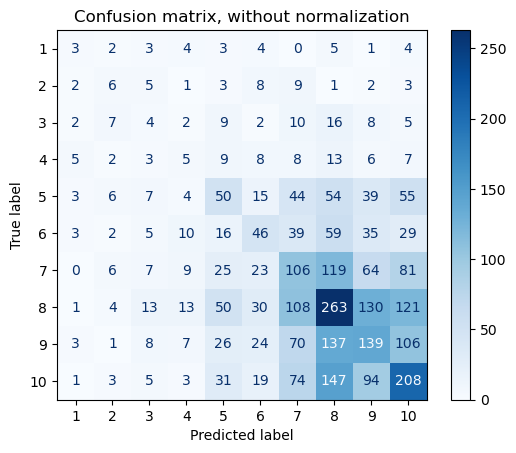

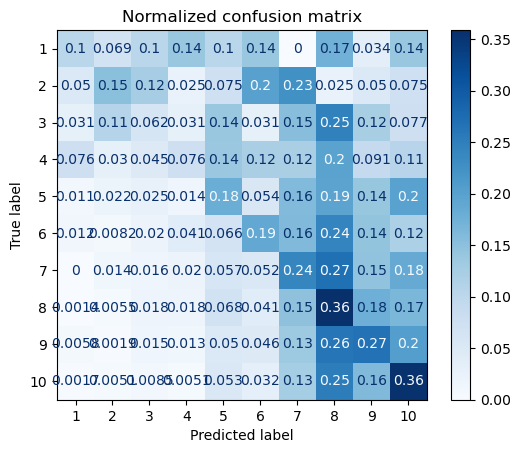

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

classifier = rfc

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        # display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [55]:
rfc.score(X_train, y_train)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.1s finished


0.9514285714285714

In [56]:
feature_importance = pd.DataFrame({'Feature_names': X.columns, 'Importances': rfc.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importances', ascending=False)
feature_importance

,Feature_names,Importances
23,age,0.497919
0,isbn13,0.157468
1,normalized_year_of_publication,0.138287
65,state_other,0.015628
22,publisher_other,0.009692
...,...,...
17,publisher_st_martins_pr,0.000000
21,publisher_zebra_books,0.000000
3,publisher_silhouette,0.000000
2,publisher_harlequin,0.000000


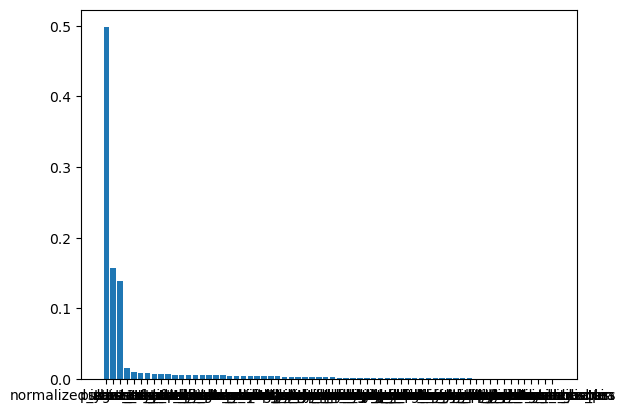

In [57]:
plt.bar(feature_importance['Feature_names'], feature_importance['Importances'])
plt.show()

In [58]:
country_importance = feature_importance.loc[lambda x: x['Feature_names'].str.contains("^country", regex=True)]
country_importance

,Feature_names,Importances
24,country_usa,0.008826
44,country_other,0.007324
25,country_canada,0.005728
29,country_australia,0.003533
27,country_germany,0.003514
28,country_spain,0.003187
26,country_united_kingdom,0.003005
32,country_portugal,0.002747
41,country_malaysia,0.002565
35,country_switzerland,0.002052


In [59]:
state_importance = feature_importance.loc[lambda x: x['Feature_names'].str.contains("^state", regex=True)]
state_importance

,Feature_names,Importances
65,state_other,0.015628
45,state_california,0.008763
49,state_texas,0.006800
50,state_new_york,0.006636
54,state_washington,0.006132
53,state_illinois,0.006037
51,state_florida,0.005929
61,state_missouri,0.005576
58,state_oregon,0.005484
60,state_massachusetts,0.005193


In [60]:
publisher_importance = feature_importance.loc[lambda x: x['Feature_names'].str.contains("^publisher", regex=True)]
publisher_importance

,Feature_names,Importances
22,publisher_other,0.009692
7,publisher_scholastic,0.004669
5,publisher_ballantine_books,0.003809
4,publisher_pocket,0.003643
11,publisher_warner_books,0.002155
15,publisher_signet_book,0.002107
13,publisher_harpercollins,0.002041
10,publisher_berkley_publishing_group,0.002038
6,publisher_bantam_books,0.001939
9,publisher_penguin_books,0.001484


In [61]:
age_importance = feature_importance.loc[lambda x: x['Feature_names'].str.contains("age", regex=True)]["Importances"]
print("age:", age_importance)
print("country_importance:", country_importance["Importances"].sum())
print("state_importance:", state_importance["Importances"].sum())
print("publisher_importance:", publisher_importance["Importances"].sum())

age: 23    0.497919
Name: Importances, dtype: float64
country_importance: 0.05400003365757386
state_importance: 0.11221405792477848
publisher_importance: 0.04011238677272311
